# MAT281 - Laboratorio N°10



<a id='p1'></a>
## I.- Problema 01


<img src="https://www.goodnewsnetwork.org/wp-content/uploads/2019/07/immunotherapy-vaccine-attacks-cancer-cells-immune-blood-Fotolia_purchased.jpg" width="360" height="360" align="center"/>


El **cáncer de mama**  es una proliferación maligna de las células epiteliales que revisten los conductos o lobulillos mamarios. Es una enfermedad clonal; donde una célula individual producto de una serie de mutaciones somáticas o de línea germinal adquiere la capacidad de dividirse sin control ni orden, haciendo que se reproduzca hasta formar un tumor. El tumor resultante, que comienza como anomalía leve, pasa a ser grave, invade tejidos vecinos y, finalmente, se propaga a otras partes del cuerpo.

El conjunto de datos se denomina `BC.csv`, el cual contine la información de distintos pacientes con tumosres (benignos o malignos) y algunas características del mismo.


Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.
Los detalles se puede encontrar en [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","BC.csv"), sep=",")
df['diagnosis'] = df['diagnosis'] .replace({'M':1,'B':0}) # target 
df.head()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

Basado en la información presentada responda las siguientes preguntas:

### 1. Realice un análisis exploratorio del conjunto de datos.

In [3]:
df.shape

(569, 32)

El dataframe tiene 569 filas y 32 columnas.

In [4]:
#Sacaremos la columna 'id' ya que no tiene significancia para este laboratorio
df.drop('id', axis =1, inplace = True)
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [5]:
df.shape

(569, 31)

Ahora el dataframe tiene 569 filas y 31 columnas.

In [6]:
#Veamos si existen elementos nulos
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Dado que la suma fue 0 para cada fila entonces no existen elementos nulos.

In [7]:
df.drop('diagnosis',axis =1, inplace = False).describe().T

count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se                  569.0   40.337079   45.491006    6.802000   
smoothness_se            569.0    0.007041    0.003003    0.001713   
compactness_se           569.0    0.025478    0.017908    0.002252   
concavity_se             569.0    0.031894    0.030186    0.000000   
concave points_se        569.0    0.011796    0.006170    0.000000   
symmetry_se              569.0    0.020542    0.008266    0.007882   
fractal_dimension_se     569.0    0.003795    0.002646    0.000895   
radius_worst             569.0   16.269190    4.833242    7.930000   
texture_worst            569.0   25.677223    6.146258   12.020000   
perimeter_worst          569.0  107.261213   33.602542   50.410000   
area_worst               569.0  880.583128  569.356993  185.200000   
smoothness_worst         569.0    0.132369    0.022832    0.071170   
compactness_worst        569.0    0.254265    0.157336    0.027290   
concavity_worst          569.0    0.272188    0.208624    0.000000   
concave points_worst     569.0    0.114606    0.065732    0.000000   
symmetry_worst           569.0    0.290076    0.061867    0.156500   
fractal_dimension_worst  569.0    0.083946    0.018061    0.055040   

                                25%         50%          75%         max  
radius_mean               11.700000   13.370000    15.780000    28.11000  
texture_mean              16.170000   18.840000    21.800000    39.28000  
perimeter_mean            75.170000   86.240000   104.100000   188.50000  
area_mean                420.300000  551.100000   782.700000  2501.00000  
smoothness_mean            0.086370    0.095870     0.105300     0.16340  
compactness_mean           0.064920    0.092630     0.130400     0.34540  
concavity_mean             0.029560    0.061540     0.130700     0.42680  
concave points_mean        0.020310    0.033500     0.074000     0.20120  
symmetry_mean              0.161900    0.179200     0.195700     0.30400  
fractal_dimension_mean     0.057700    0.061540     0.066120     0.09744  
radius_se                  0.232400    0.324200     0.478900     2.87300  
texture_se                 0.833900    1.108000     1.474000     4.88500  
perimeter_se               1.606000    2.287000     3.357000    21.98000  
area_se                   17.850000   24.530000    45.190000   542.20000  
smoothness_se              0.005169    0.006380     0.008146     0.03113  
compactness_se             0.013080    0.020450     0.032450     0.13540  
concavity_se               0.015090    0.025890     0.042050     0.39600  
concave points_se          0.007638    0.010930     0.014710     0.05279  
symmetry_se                0.015160    0.018730     0.023480     0.07895  
fractal_dimension_se       0.002248    0.003187     0.004558     0.02984  
radius_worst              13.010000   14.970000    18.790000    36.04000  
texture_worst             21.080000   25.410000    29.720000    49.54000  
perimeter_worst           84.110000   97.660000   125.400000   251.20000  
area_worst               515.300000  686.500000  1084.

In [8]:
df.diagnosis.unique()

array([1, 0], dtype=int64)

Notar que la fila 'diagnosis' toma valor 1 o 0, siendo 1 = Maligno y 0 = Benigno

In [9]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

Hay 357 casos benignos y 212 casos malignos. Lo llevamos a un dataframe y graficamos:

In [10]:
df_diagnosis = df.groupby('diagnosis').apply(lambda x: len(x)).reset_index()
df_diagnosis.columns = ['diagnosis','count']
df_diagnosis.head()

diagnosis  count
0          0    357
1          1    212

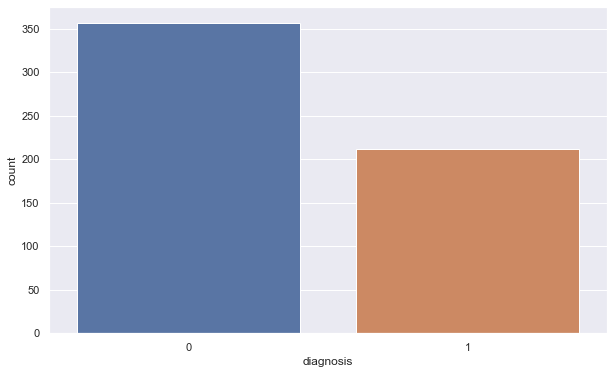

In [11]:
# plot seaborn: barplot
plt.figure(figsize=(10, 6))

sns.barplot(
    x='diagnosis',
    y= 'count',
    data = df_diagnosis
)
plt.show()

Podemos notar claramente que hay mas casos benignos que malignos.

Veamos la correlación:

In [12]:
df.corr()

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                 0.567134     0.679090      0.275869        0.691765   
texture_se               -0.008303    -0.097317      0.386358       -0.086761   
perimeter_se              0.556141     0.674172      0.281673        0.693135   
area_se                   0.548236     0.735864      0.259845        0.744983   
smoothness_se            -0.067016    -0.222600      0.006614       -0.202694   
compactness_se            0.292999     0.206000      0.191975        0.250744   
concavity_se              0.253730     0.194204      0.143293        0.228082   
concave points_se         0.408042     0.376169      0.163851        0.407217   
symmetry_se              -0.006522    -0.104321      0.009127       -0.081629   
fractal_dimension_se      0.077972    -0.042641      0.054458       -0.005523   
radius_worst              0.776454     0.969539      0.352573        0.969476   
texture_worst             0.456903     0.297008      0.912045        0.303038   
perimeter_worst           0.782914     0.965137      0.358040        0.970387   
area_worst                0.733825     0.941082      0.343546        0.941550   
smoothness_worst          0.421465     0.119616      0.077503        0.150549   
compactness_worst         0.590998     0.413463      0.277830        0.455774   
concavity_worst           0.659610     0.526911      0.301025        0.563879   
concave points_worst      0.793566     0.744214      0.295316        0.771241   
symmetry_worst            0.416294     0.163953      0.105008        0.189115   
fractal_dimension_worst   0.323872     0.007066      0.119205        0.051019   

                         area_mean  smoothness_mean  compactness_mean  \
diagnosis                 0.708984         0.358560          0.596534   
radius_mean               0.987357         0.170581          0.506124   
texture_mean              0.321086        -0.023389          0.236702   
perimeter_mean            0.986507         0.207278          0.556936   
area_mean                 1.000000         0.177028          0.498502   
smoothness_mean           0.177028         1.000000          0.659123   
compactness_mean          0.498502         0.659123          1.000000   
concavity_mean            0.685983         0.521984          0.883121   
concave points_mean       0.823269         0.553695          0.831135   
symmetry_mean             0.151293         0.557775          0.602641   
fractal_dimension_mean   -0.283110         0.584792          0.565369   
radius_se                 0.732562         0.301467          0.497473   
texture_se               -0.066280         0.068406          0.046205   
perimeter_se              0.726628         0.296092          0.548905   
area_se                   0.800086         0.246552          0.455653   
smoothness_se            -0.166777         0.332375          0.135299   
compactness_se            0.212583         0.318943          0.738722   
concavity_se              0.207660         0.248396          0.570517   
concave points_se         0.372320         0.

Graficamente:

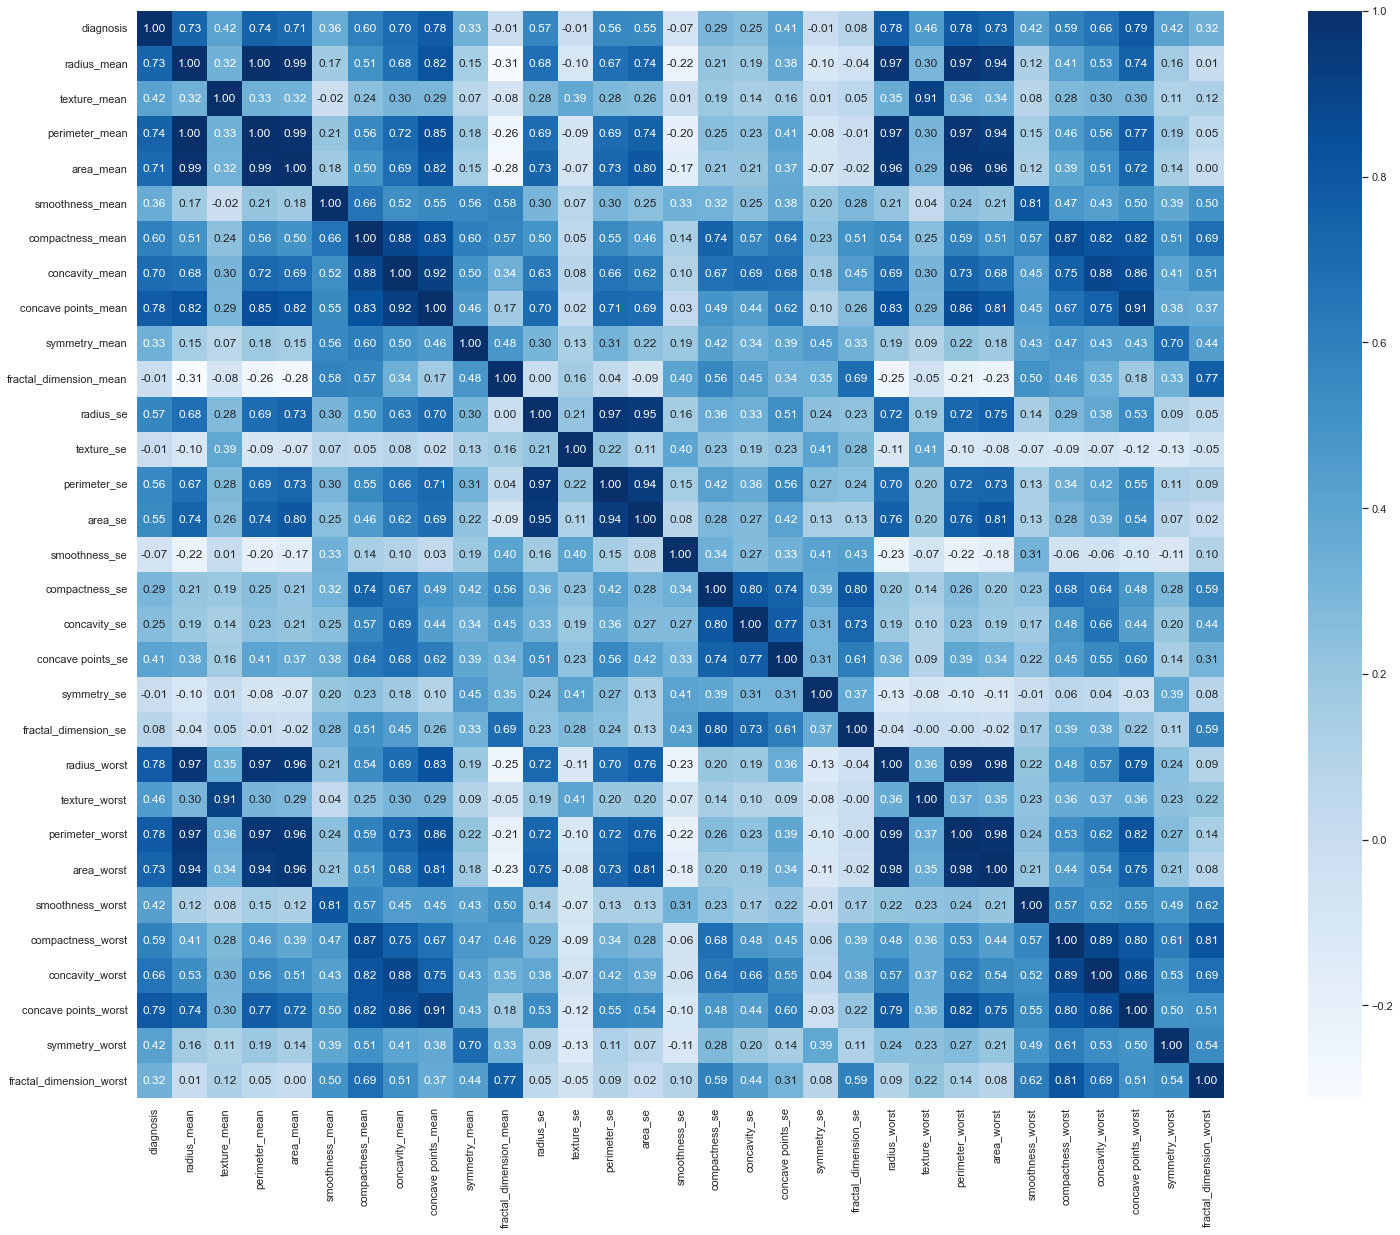

In [13]:
#matriz de correlacion
corr_mat = df.corr(method='pearson')
plt.figure(figsize=(30,20))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='Blues',fmt='.2f')
plt.show()

En este caso mientras mas intenso es el color azul, mayor es la correlacion entre los datos, es decir mas cercano a 1. Mientras menos intenso sea el azul, es decir, mientras mas blanco sea el color, menor correlacion existe entre los datos (se acerca a 0).

Se puede notar a grandes rasgos que en la esquina inferior izquierda y en la esquina superior derecha se ven azules mas intensos, es decir, existe mayor correlacion entre esas variables. Esto quiere decir que las variables "worst" estan correlacionadas con las demas entonces las podemos sacar.

Viendolo de otra manera:

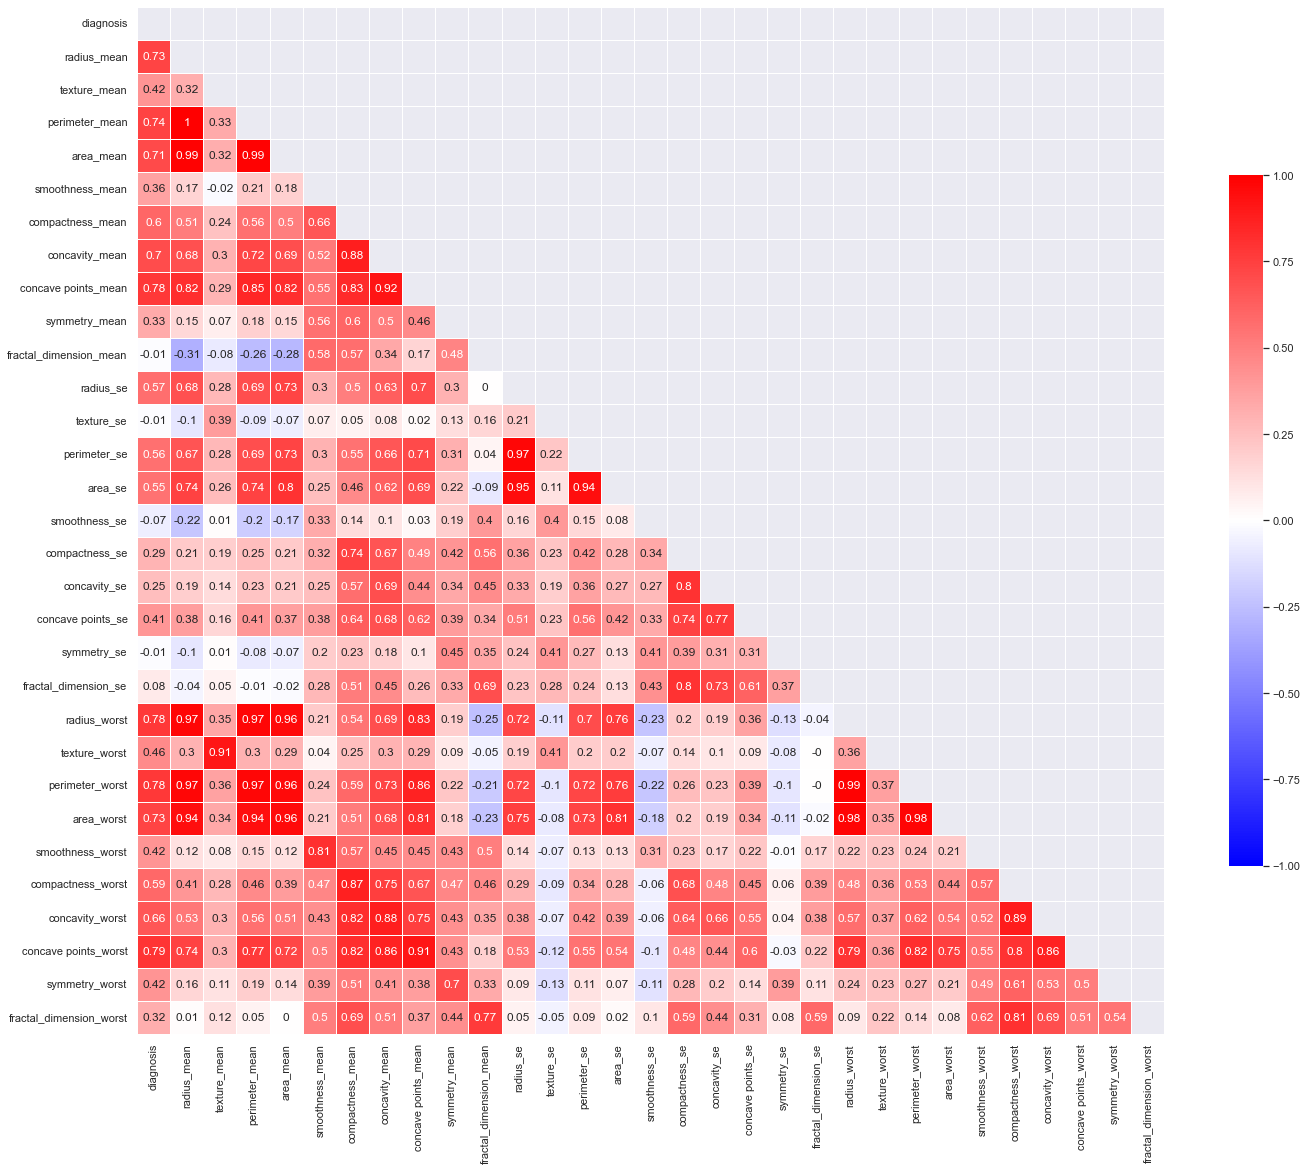

In [14]:
corr = df.corr().round(2)

#mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] =  True

#set figure size
f, ax = plt.subplots(figsize = (20,20))


#draw the heatmap
sns.heatmap(corr, mask = mask, cmap='bwr', vmin = -1, vmax=1, center =0, square = True,
           linewidths =.5,cbar_kws={"shrink":.5},annot = True)
plt.tight_layout()

Los azules y rojos mas intensos implican una mayor correlacion. mientras los cuadros que se asemejen mas al blanco tienen menor correlacion.

Notar que por ejemplo, la columna "radius_mean" tiene una correlación de 1 con la columna "perimeter_mean", 0,99 con la columna "area_mean", es decir que las columnas que tengan alta correlacion con respecto a las otras variables nos entregan la misma informacion por lo que tendremos que sacarlas para realizar un analisis.

In [15]:
mean=df.columns[1:11]
se=df.columns[11:21]
worst = df.columns[21:31]
columnas_mean = df.columns.drop(se).drop(worst)
columnas_se = df.columns.drop(mean).drop(worst)
columnas_worst = df.columns.drop(mean).drop(se)

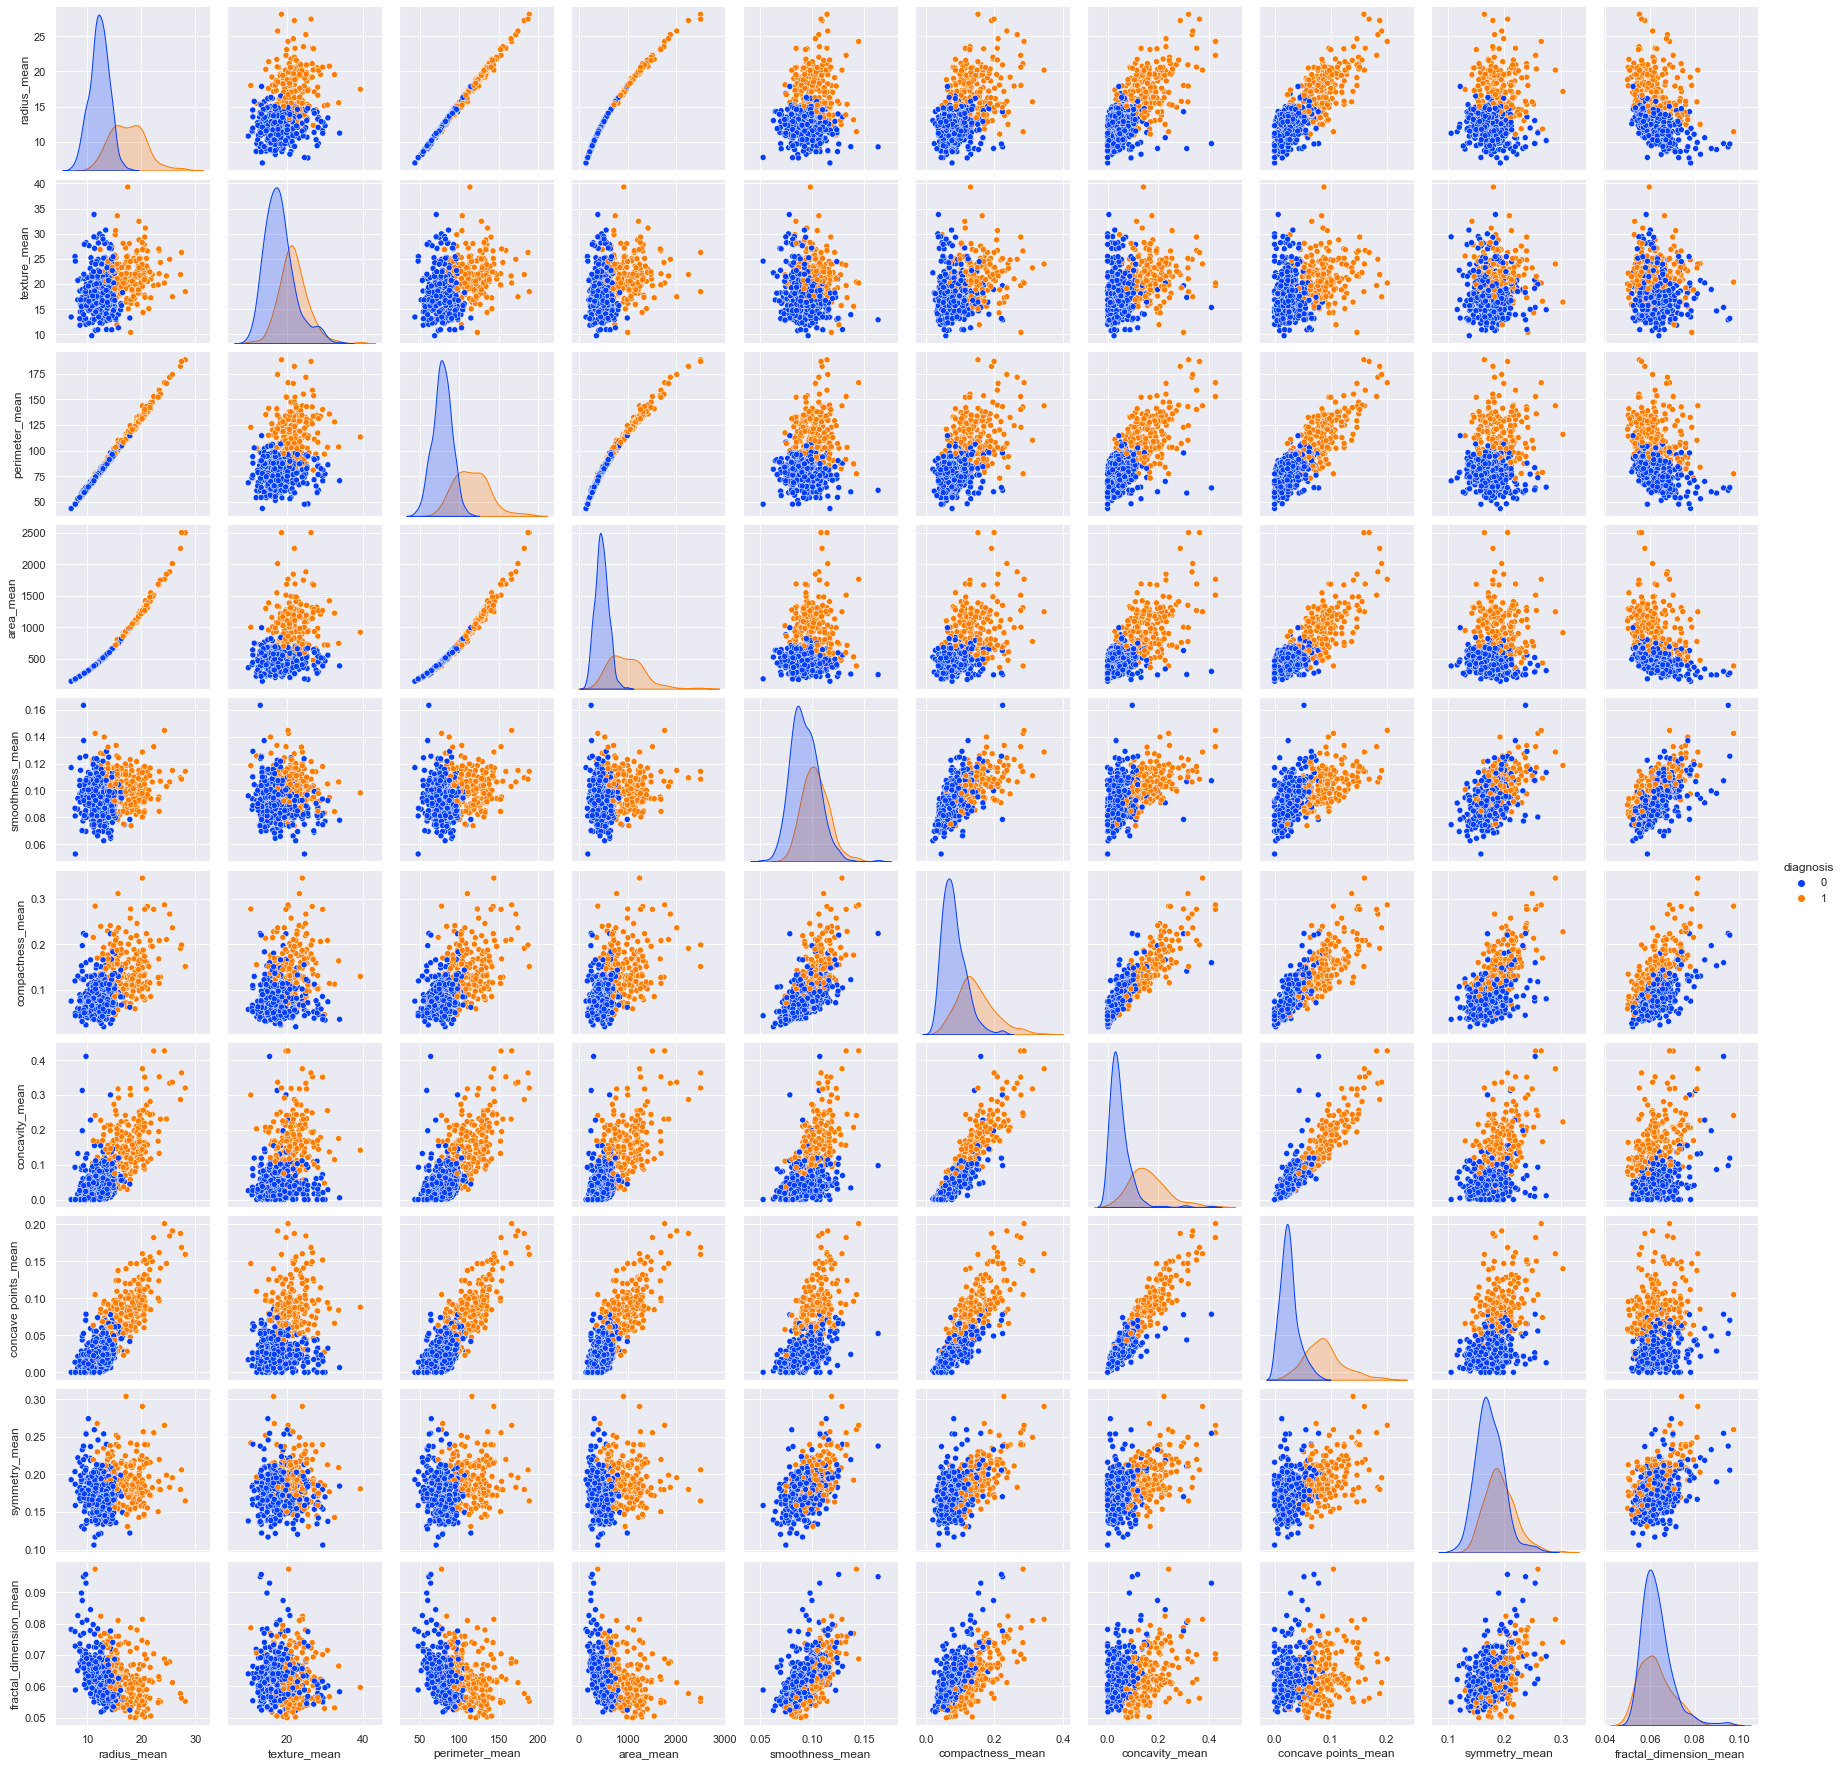

In [16]:
sns.pairplot(data = df[columnas_mean], hue = 'diagnosis', palette = 'bright')

Podemos ver que existe tendencia lineal entre las variables: "radius", "perimeter" y "area". Otro conjunto de variables que tambien tienen tendencia lineal son: "concavity", "concave points" y "compactness".


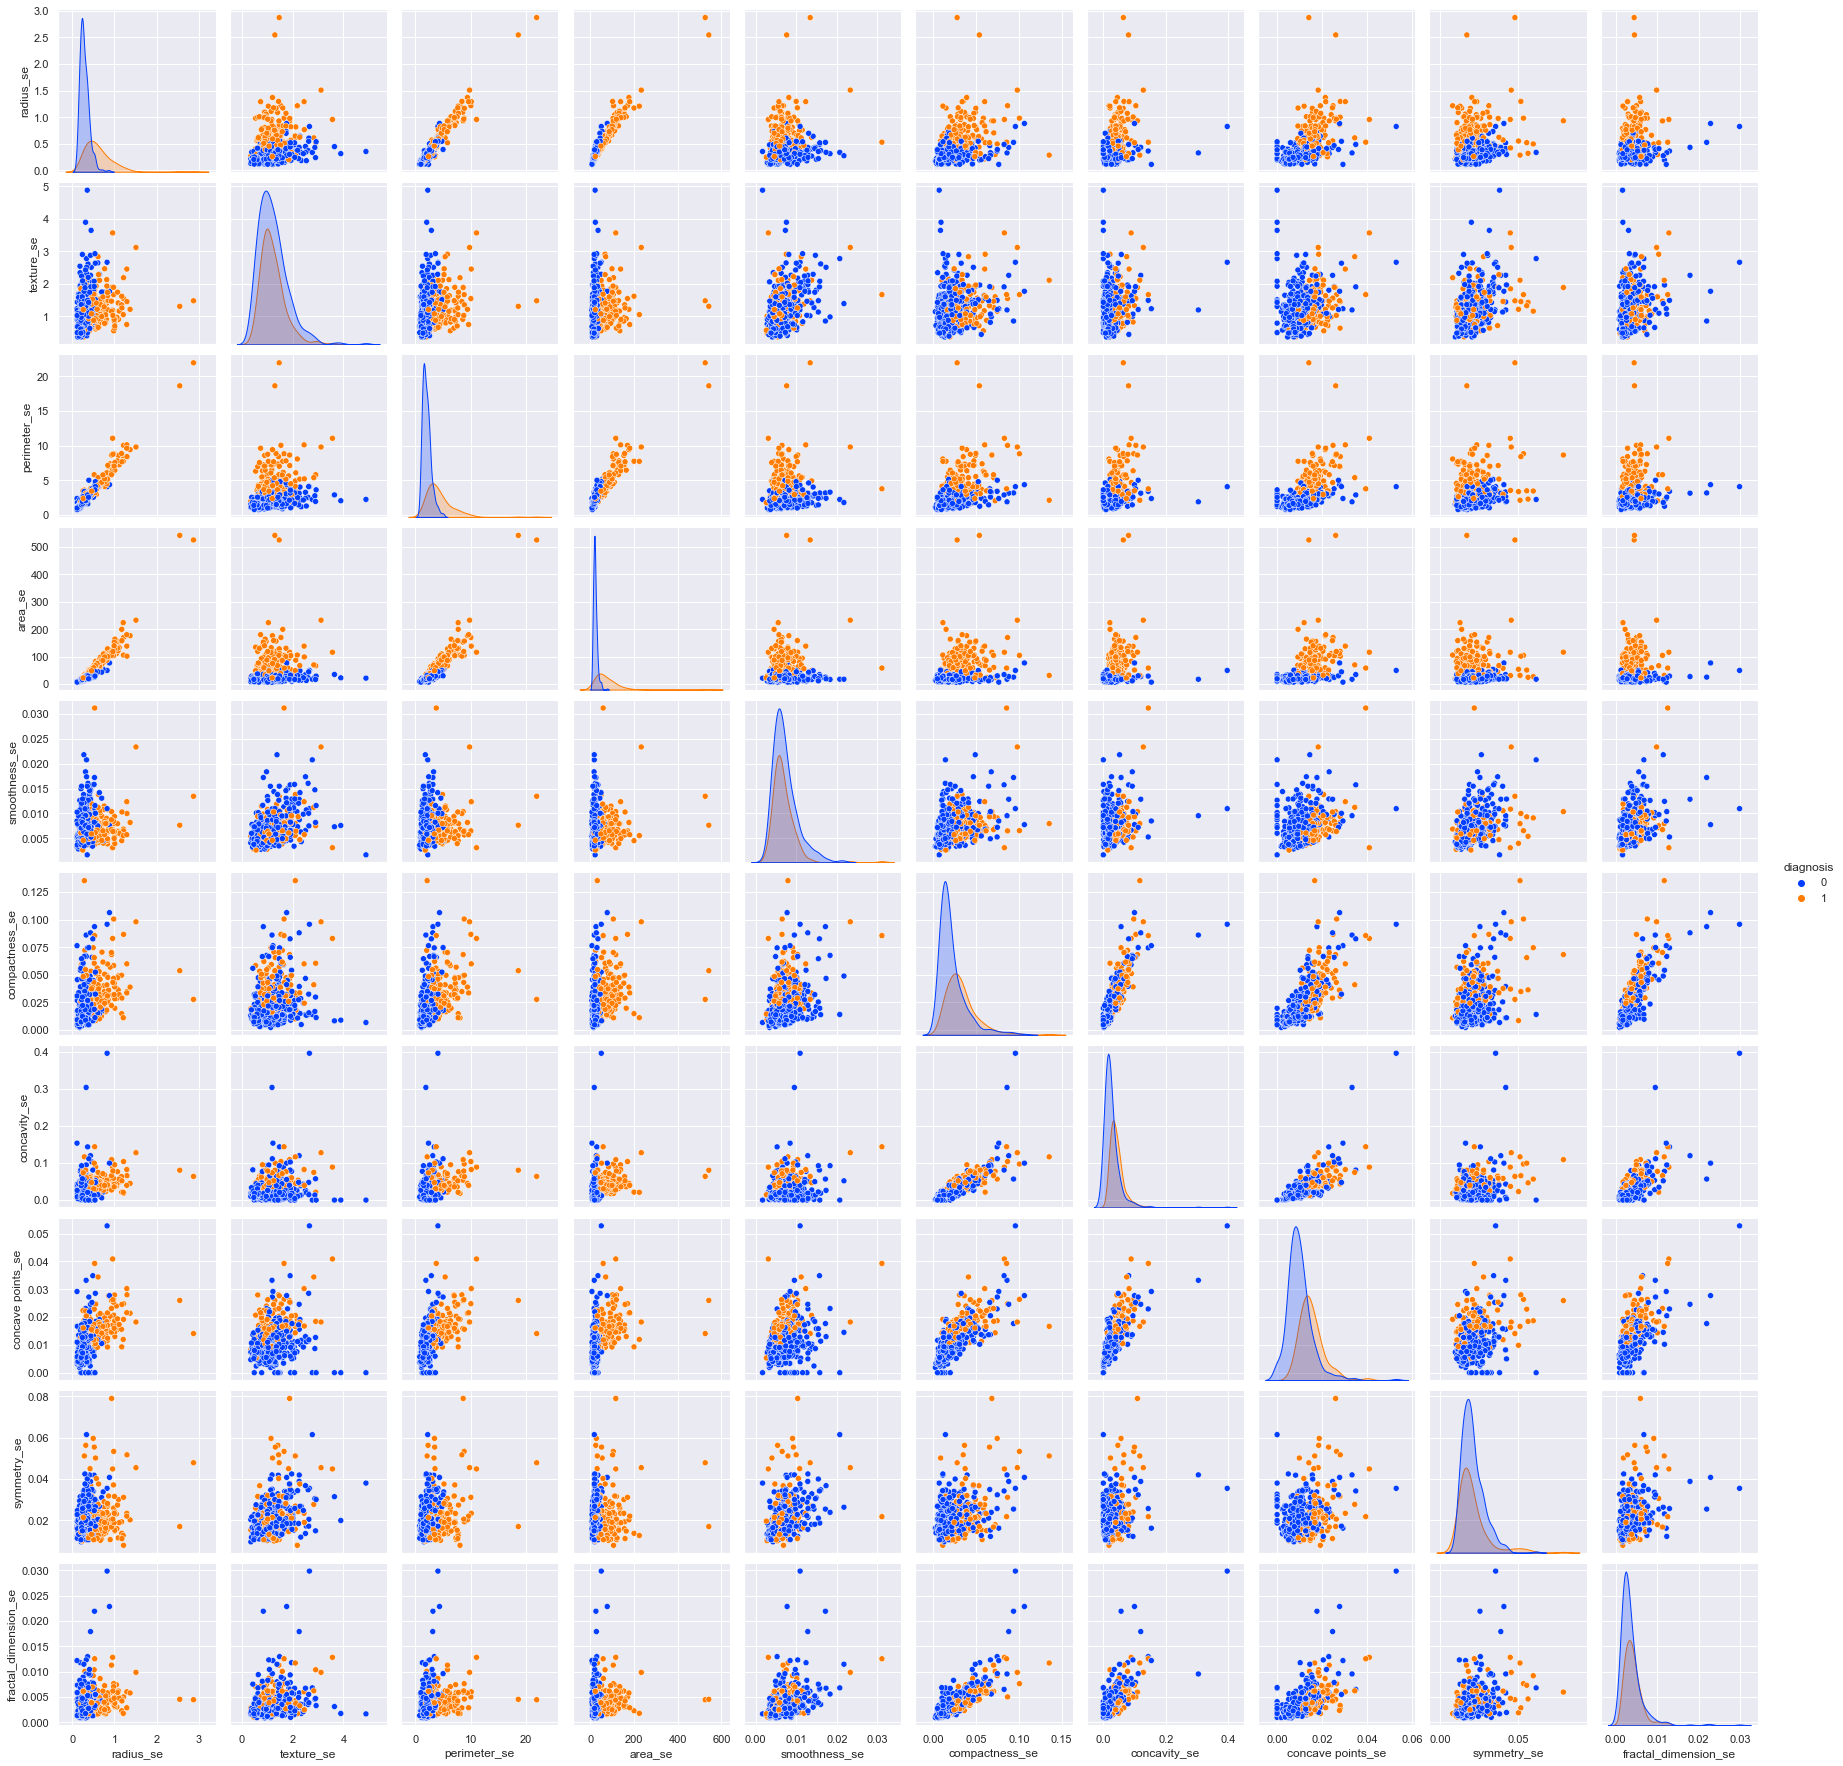

In [17]:
sns.pairplot(data = df[columnas_se], hue = 'diagnosis', palette = 'bright')

Aqui podemos ver que algunas variables estan bastante correlacionadas. Es decir, que nos entregan la misma informacion.

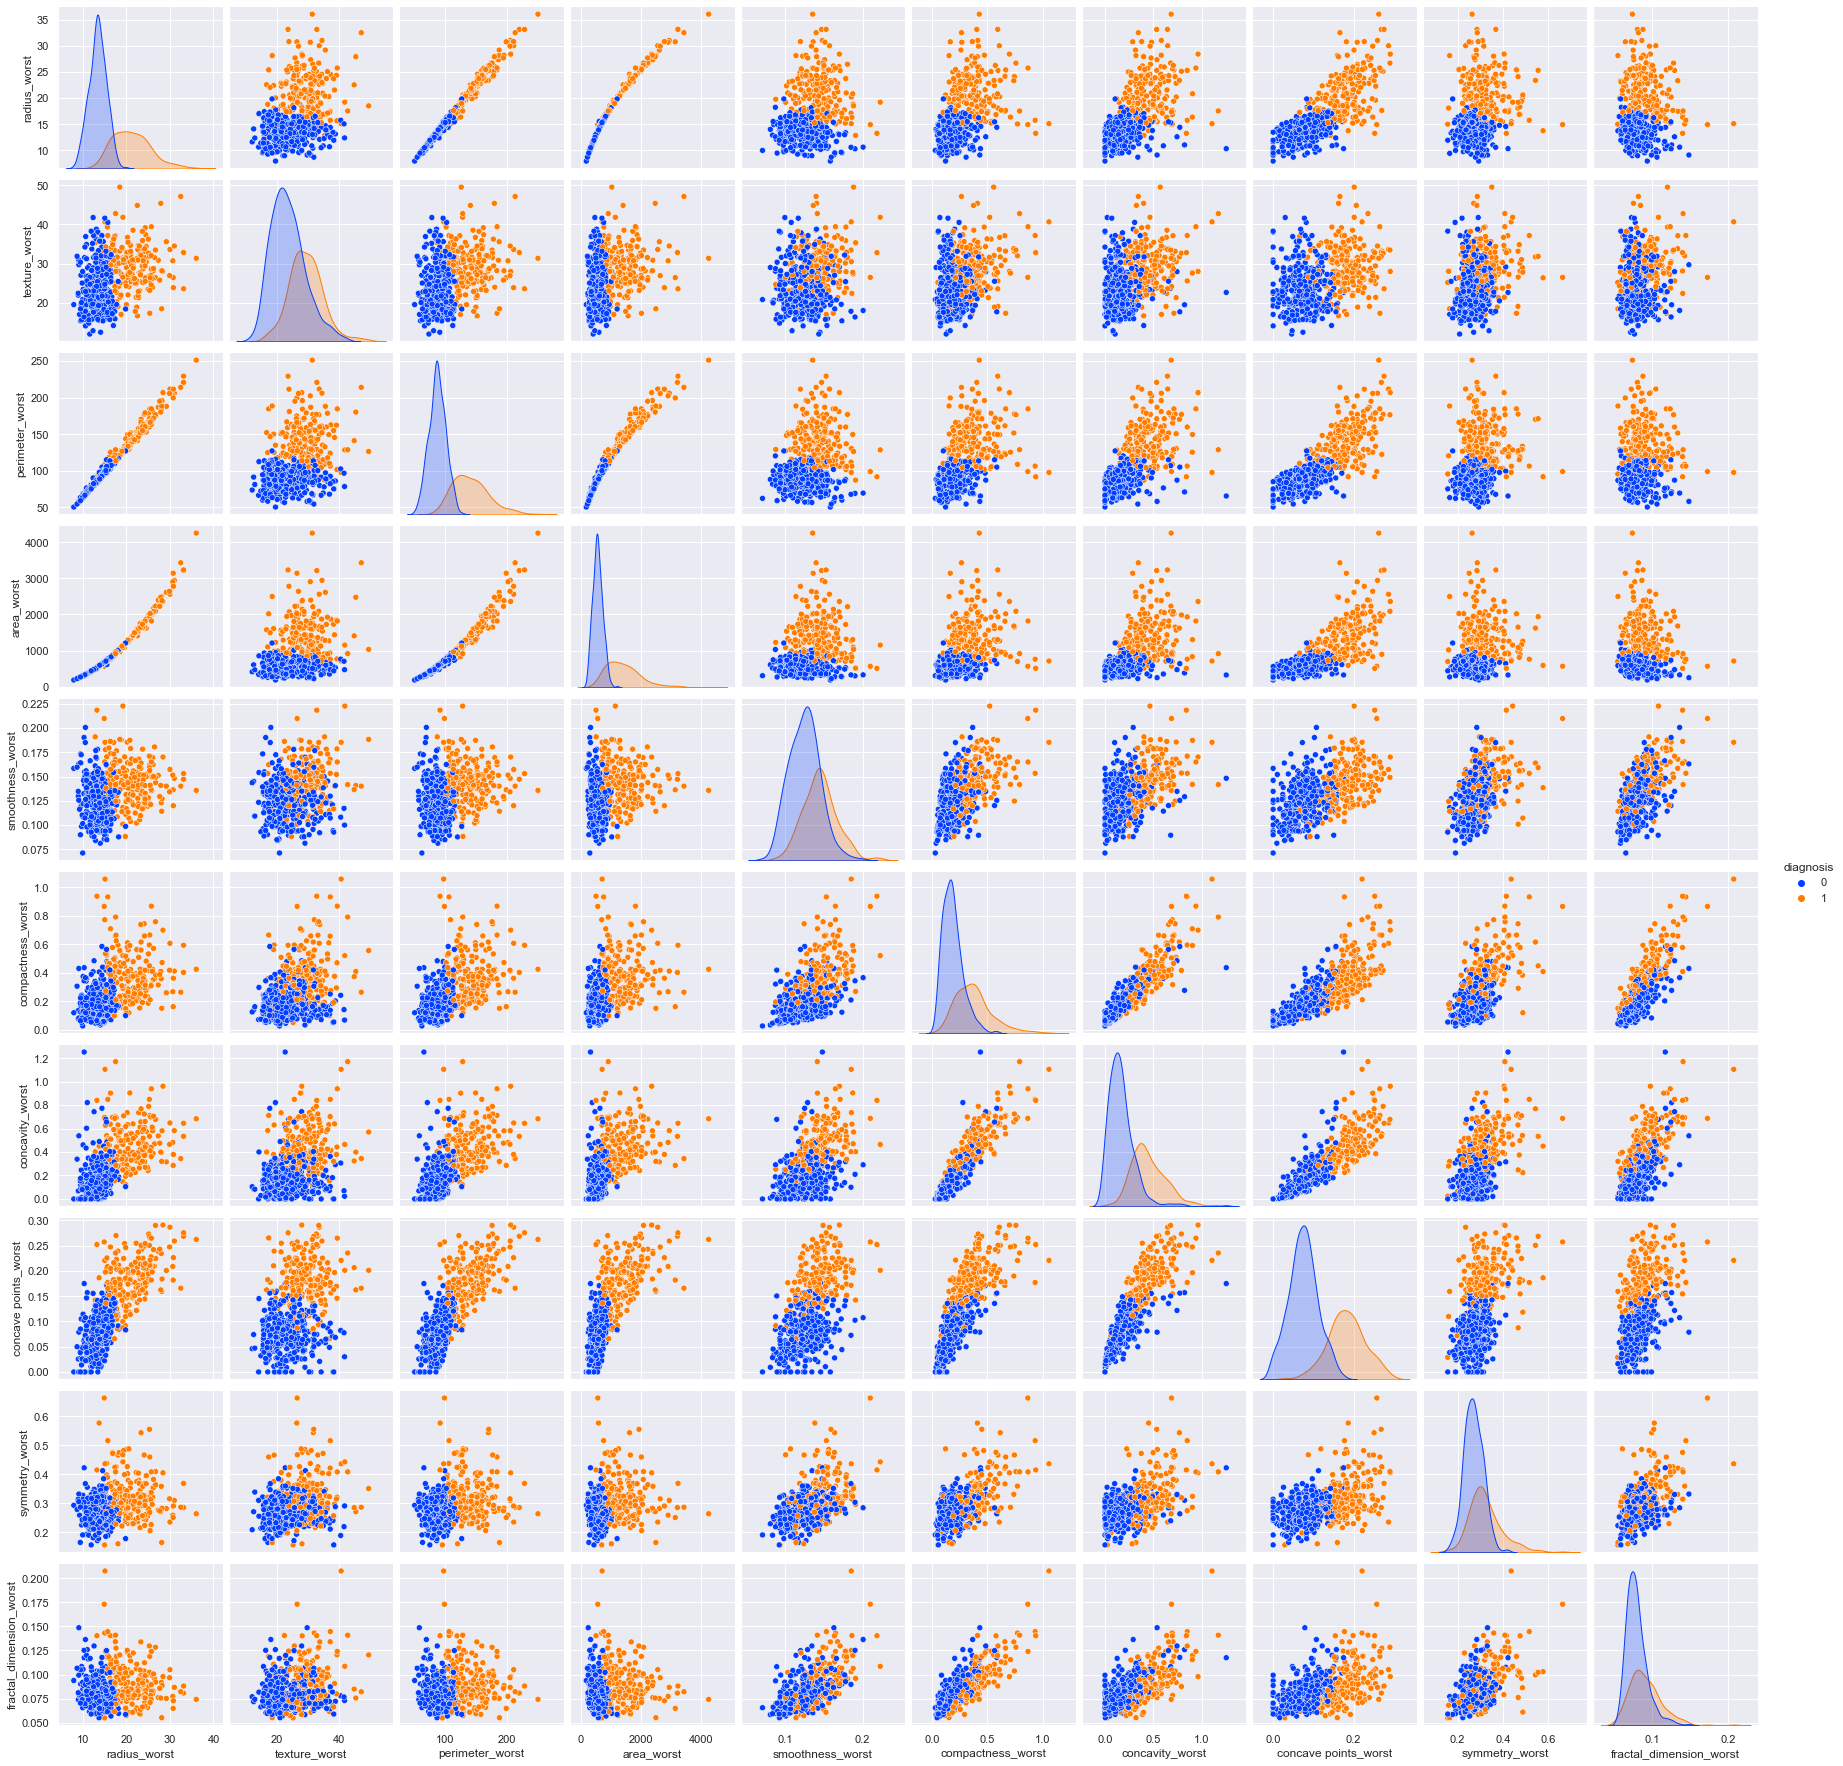

In [18]:
sns.pairplot(data = df[columnas_worst], hue = 'diagnosis', palette = 'bright')

Por lo tanto, las columnas que sacaremos son:
* 1. Columnas de "worst"
* 2. Columnas relacionadas con "perimeter" y "area"
* 3. Columnas relacionadas con "concavity" y "concave points"

In [19]:
n1 = df.columns[21:31]
n2 = ['perimeter_mean','perimeter_se', 'area_mean','area_se']
n3 = ['concavity_mean','concavity_se','concave points_mean','concave points_se']
df_new3 = df.drop(n1, axis = 1, inplace=False)
df_new2 = df_new3.drop(n2, axis = 1, inplace=False)
df_new = df_new2.drop(n3, axis = 1, inplace=False)
df_new

diagnosis  radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0            1        17.99         10.38          0.11840           0.27760   
1            1        20.57         17.77          0.08474           0.07864   
2            1        19.69         21.25          0.10960           0.15990   
3            1        11.42         20.38          0.14250           0.28390   
4            1        20.29         14.34          0.10030           0.13280   
..         ...          ...           ...              ...               ...   
564          1        21.56         22.39          0.11100           0.11590   
565          1        20.13         28.25          0.09780           0.10340   
566          1        16.60         28.08          0.08455           0.10230   
567          1        20.60         29.33          0.11780           0.27700   
568          0         7.76         24.54          0.05263           0.04362   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0           0.2419                 0.07871     1.0950      0.9053   
1           0.1812                 0.05667     0.5435      0.7339   
2           0.2069                 0.05999     0.7456      0.7869   
3           0.2597                 0.09744     0.4956      1.1560   
4           0.1809                 0.05883     0.7572      0.7813   
..             ...                     ...        ...         ...   
564         0.1726                 0.05623     1.1760      1.2560   
565         0.1752                 0.05533     0.7655      2.4630   
566         0.1590                 0.05648     0.4564      1.0750   
567         0.2397                 0.07016     0.7260      1.5950   
568         0.1587                 0.05884     0.3857      1.4280   

     smoothness_se  compactness_se  symmetry_se  fractal_dimension_se  
0         0.006399         0.04904      0.03003              0.006193  
1         0.005225         0.01308      0.01389              0.003532  
2         0.006150         0.04006      0.02250              0.004571  
3         0.009110         0.07458      0.05963              0.009208  
4         0.011490         0.02461      0.01756              0.005115  
..             ...             ...          ...                   ...  
564       0.010300         0.02891      0.01114              0.004239  
565       0.005769         0.02423      0.01898              0.002498  
566       0.005903         0.03731      0.01318              0.003892  
567       0.006522         0.06158      0.02324              0.006185  
568       0.007189         0.00466      0.02676              0.002783  

[569 rows x 13 columns]

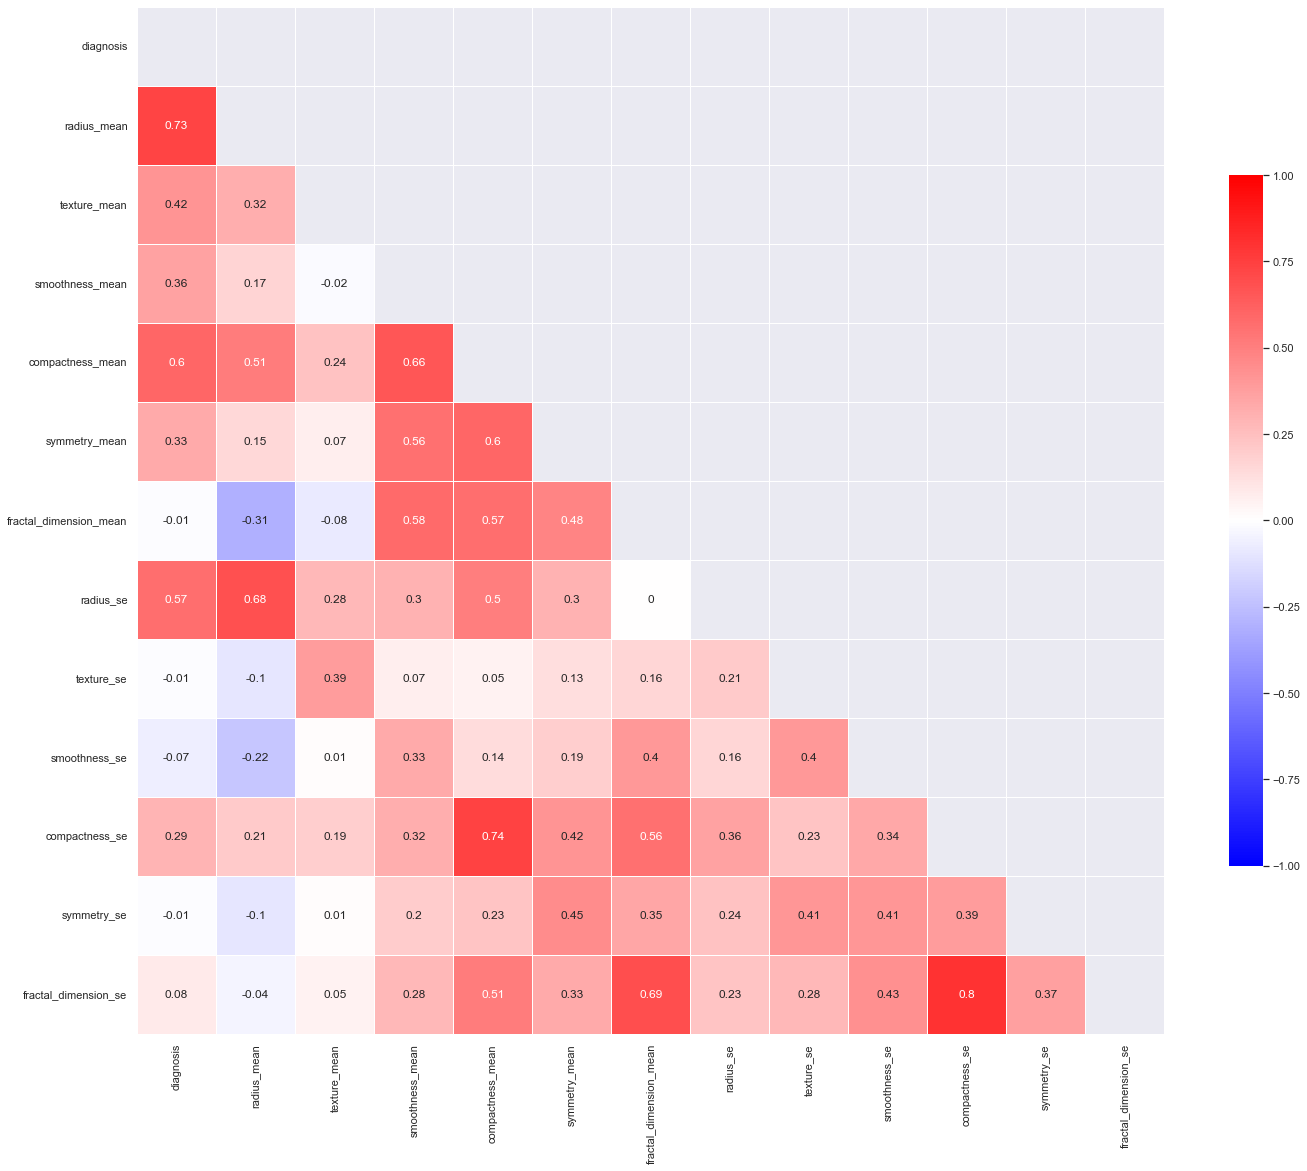

In [20]:
corr = df_new.corr().round(2)

#mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] =  True

#set figure size
f, ax = plt.subplots(figsize = (20,20))


#draw the heatmap
sns.heatmap(corr, mask = mask, cmap='bwr', vmin = -1, vmax=1, center =0, square = True,
           linewidths =.5,cbar_kws={"shrink":.5},annot = True)
plt.tight_layout()

Ahora tenemos colores mucho mas suaves, es decir, variables con menor correlacion.

In [21]:
df1 = df_new.drop('diagnosis', axis =1)

In [22]:
df1

radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0          17.99         10.38          0.11840           0.27760   
1          20.57         17.77          0.08474           0.07864   
2          19.69         21.25          0.10960           0.15990   
3          11.42         20.38          0.14250           0.28390   
4          20.29         14.34          0.10030           0.13280   
..           ...           ...              ...               ...   
564        21.56         22.39          0.11100           0.11590   
565        20.13         28.25          0.09780           0.10340   
566        16.60         28.08          0.08455           0.10230   
567        20.60         29.33          0.11780           0.27700   
568         7.76         24.54          0.05263           0.04362   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0           0.2419                 0.07871     1.0950      0.9053   
1           0.1812                 0.05667     0.5435      0.7339   
2           0.2069                 0.05999     0.7456      0.7869   
3           0.2597                 0.09744     0.4956      1.1560   
4           0.1809                 0.05883     0.7572      0.7813   
..             ...                     ...        ...         ...   
564         0.1726                 0.05623     1.1760      1.2560   
565         0.1752                 0.05533     0.7655      2.4630   
566         0.1590                 0.05648     0.4564      1.0750   
567         0.2397                 0.07016     0.7260      1.5950   
568         0.1587                 0.05884     0.3857      1.4280   

     smoothness_se  compactness_se  symmetry_se  fractal_dimension_se  
0         0.006399         0.04904      0.03003              0.006193  
1         0.005225         0.01308      0.01389              0.003532  
2         0.006150         0.04006      0.02250              0.004571  
3         0.009110         0.07458      0.05963              0.009208  
4         0.011490         0.02461      0.01756              0.005115  
..             ...             ...          ...                   ...  
564       0.010300         0.02891      0.01114              0.004239  
565       0.005769         0.02423      0.01898              0.002498  
566       0.005903         0.03731      0.01318              0.003892  
567       0.006522         0.06158      0.02324              0.006185  
568       0.007189         0.00466      0.02676              0.002783  

[569 rows x 12 columns]

In [23]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
round(df1.mean(), 2)

----------------------
Media de cada variable
----------------------


radius_mean               14.13
texture_mean              19.29
smoothness_mean            0.10
compactness_mean           0.10
symmetry_mean              0.18
fractal_dimension_mean     0.06
radius_se                  0.41
texture_se                 1.22
smoothness_se              0.01
compactness_se             0.03
symmetry_se                0.02
fractal_dimension_se       0.00
dtype: float64

In [24]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
round(df1.var(), 2)

-------------------------
Varianza de cada variable
-------------------------


radius_mean               12.42
texture_mean              18.50
smoothness_mean            0.00
compactness_mean           0.00
symmetry_mean              0.00
fractal_dimension_mean     0.00
radius_se                  0.08
texture_se                 0.30
smoothness_se              0.00
compactness_se             0.00
symmetry_se                0.00
fractal_dimension_se       0.00
dtype: float64

Si no se estandarizan las variables para que tengan media cero y desviación estándar de uno antes de realizar el estudio PCA, las variables de mayor varianza, que tiene una media y dispersión muy superior al resto, dominará la mayoría de las componentes principales.

### 2. Normalizar las variables numéricas con el método **StandardScaler**.



In [25]:
scaler = StandardScaler()
columns = df1.columns
df1[columns]=scaler.fit_transform(df1[columns])
df1.head()

radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0     1.097064     -2.073335         1.568466          3.283515   
1     1.829821     -0.353632        -0.826962         -0.487072   
2     1.579888      0.456187         0.942210          1.052926   
3    -0.768909      0.253732         3.283553          3.402909   
4     1.750297     -1.151816         0.280372          0.539340   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0       2.217515                2.255747   2.489734   -0.565265   
1       0.001392               -0.868652   0.499255   -0.876244   
2       0.939685               -0.398008   1.228676   -0.780083   
3       2.867383                4.910919   0.326373   -0.110409   
4      -0.009560               -0.562450   1.270543   -0.790244   

   smoothness_se  compactness_se  symmetry_se  fractal_dimension_se  
0      -0.214002        1.316862     1.148757              0.907083  
1      -0.605351       -0.692926    -0.805450             -0.099444  
2      -0.297005        0.814974     0.237036              0.293559  
3       0.689702        2.744280     4.732680              2.047511  
4       1.483067       -0.048520    -0.361092              0.499328

In [26]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
round(df1.mean(), 2)

----------------------
Media de cada variable
----------------------


radius_mean              -0.0
texture_mean              0.0
smoothness_mean          -0.0
compactness_mean          0.0
symmetry_mean             0.0
fractal_dimension_mean    0.0
radius_se                 0.0
texture_se               -0.0
smoothness_se            -0.0
compactness_se            0.0
symmetry_se               0.0
fractal_dimension_se     -0.0
dtype: float64

In [27]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
round(df1.var(), 2)

-------------------------
Varianza de cada variable
-------------------------


radius_mean               1.0
texture_mean              1.0
smoothness_mean           1.0
compactness_mean          1.0
symmetry_mean             1.0
fractal_dimension_mean    1.0
radius_se                 1.0
texture_se                1.0
smoothness_se             1.0
compactness_se            1.0
symmetry_se               1.0
fractal_dimension_se      1.0
dtype: float64

Ahora podemos ver claramente que al normalizar  las variables numericas, la media esta cerca de 0 y la varianza en 1.

### 3. Realizar un método de reducción de dimensionalidad visto en clases.

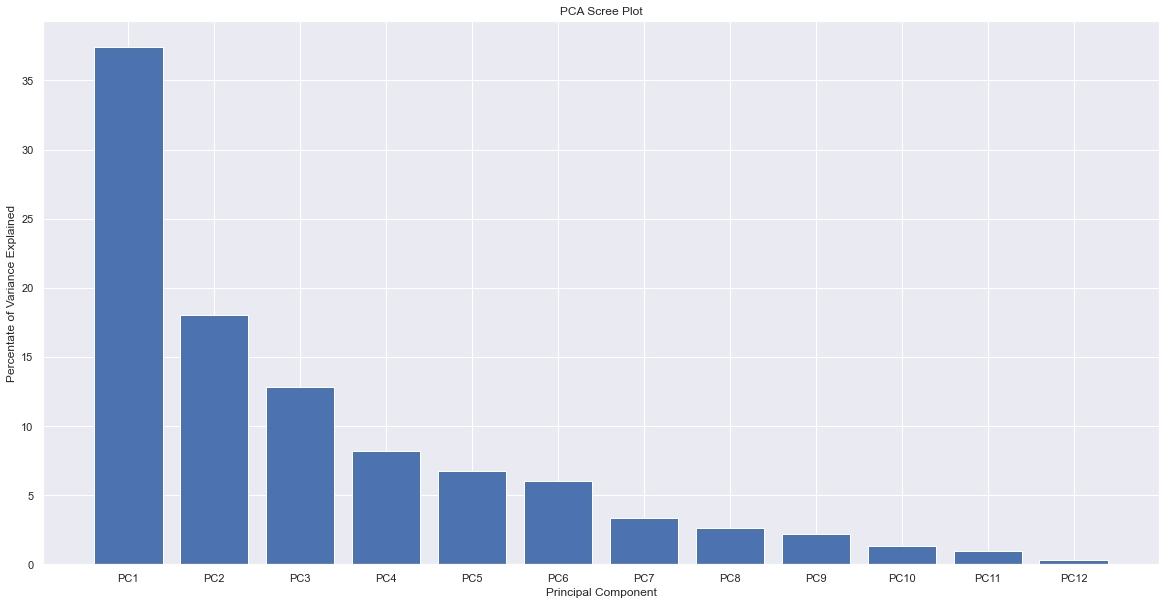

In [28]:
x = df1.values
pca = PCA(n_components=12) 
principalComponents = pca.fit_transform(x) 

# graficar varianza por componente
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7','PC8','PC9','PC10','PC11','PC12']

plt.figure(figsize=(20,10))
plt.bar(x= range(1,13), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [29]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df1)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [30]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df1.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7','PC8','PC9','PC10','PC11','PC12']
).head()

radius_mean  texture_mean  smoothness_mean  compactness_mean  \
PC1     0.102175      0.099877         0.315750          0.391959   
PC2     0.626716      0.300359         0.026245          0.246205   
PC3    -0.015057      0.457419        -0.320428         -0.237940   
PC4    -0.021623      0.239535        -0.364724          0.119844   
PC5     0.191186     -0.591455        -0.331504         -0.115751   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
PC1       0.327629                0.345465   0.242817    0.175909   
PC2       0.035123               -0.318420   0.424388   -0.116205   
PC3      -0.184454               -0.234746   0.168064    0.621224   
PC4      -0.366780                0.144354  -0.209110   -0.108632   
PC5      -0.198837               -0.229823   0.351713   -0.222491   

     smoothness_se  compactness_se  symmetry_se  fractal_dimension_se  
PC1       0.240624        0.390308     0.265375              0.359165  
PC2      -0.298288        0.013422    -0.194112             -0.180656  
PC3       0.249477        0.012351     0.254755              0.025824  
PC4      -0.207535        0.434588    -0.372517              0.461703  
PC5       0.151522        0.213667     0.320855              0.230686

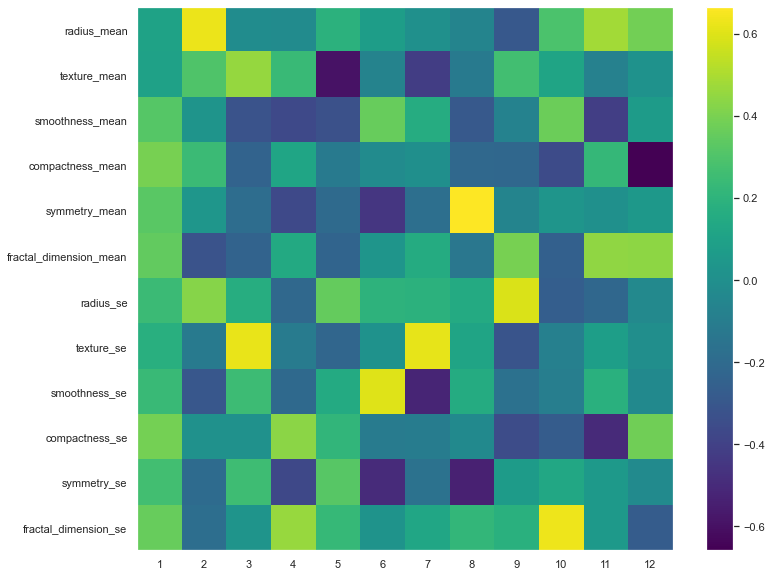

In [31]:
# Heatmap componentes
# ==============================================================================
plt.figure(figsize=(12,10))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(df1.columns)), df1.columns)
plt.xticks(range(len(df1.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar()

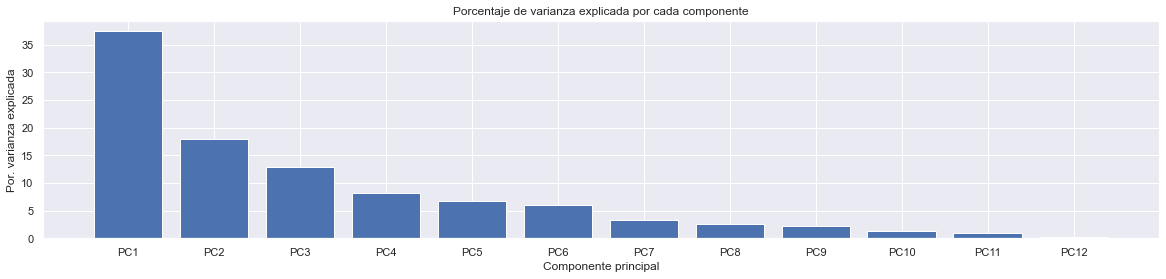

In [32]:
# graficar varianza por componente
percent_variance = np.round(modelo_pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7','PC8','PC9','PC10','PC11','PC12']

plt.figure(figsize=(20,4))
plt.bar(x= range(1,13), height=percent_variance, tick_label=columns)
plt.xticks(np.arange(modelo_pca.n_components_) + 1)

plt.ylabel('Por. varianza explicada')
plt.xlabel('Componente principal')
plt.title('Porcentaje de varianza explicada por cada componente')
plt.show()

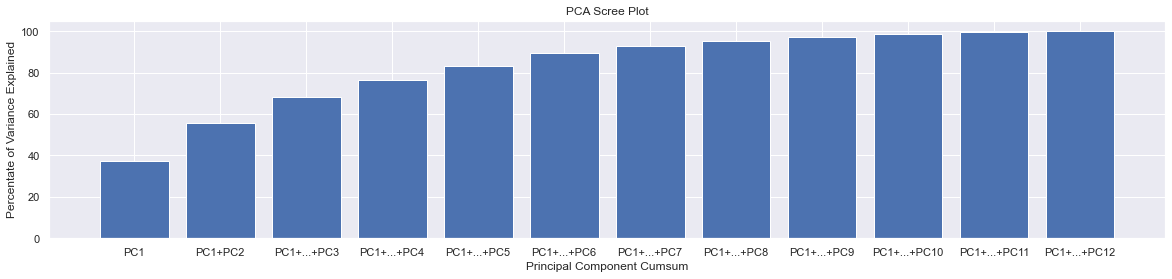

In [33]:
# graficar varianza por la suma acumulada de los componente
percent_variance_cum = np.cumsum(percent_variance)

columns = ['PC1',
          'PC1+PC2',
          'PC1+...+PC3', 
          'PC1+...+PC4', 
          'PC1+...+PC5', 
          'PC1+...+PC6',
          'PC1+...+PC7',
          'PC1+...+PC8',
          'PC1+...+PC9',
          'PC1+...+PC10',
          'PC1+...+PC11',
          'PC1+...+PC12']
plt.figure(figsize=(20,4))
plt.bar(x= range(1,13), height=percent_variance_cum, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

Transformacion:

In [34]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=df1)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7','PC8','PC9','PC10','PC11','PC12'],
    index   = df1.index
)
proyecciones.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  4.791310  1.090946 -2.841087 -1.038266  1.404878 -0.544787  1.135614   
1 -1.298507  1.834867 -0.432554  0.062477  0.938273  0.044481 -0.054211   
2  1.663649  2.183435 -0.721633 -0.253593  0.381250 -0.175747 -0.427446   
3  8.241578 -2.250837 -1.965137 -0.879580 -0.657202 -2.221046 -0.456770   
4  0.757225  1.237774 -0.624679 -0.572711  1.828040  1.611751 -0.440323   

        PC8       PC9      PC10      PC11      PC12  
0  0.040628  0.521407 -1.222763  0.617888 -0.427928  
1  0.695542  0.035014  0.582225  0.764943  0.364682  
2 -0.002428 -0.045238  0.378173 -0.358116  0.049731  
3 -2.402951  0.920390 -0.271562  0.255854  0.335820  
4  0.540374 -0.331140  0.296993  0.650176 -0.163823

Ademas se pueden reconstruir:

In [35]:
# Recostruccion de las proyecciones
# ==============================================================================
recostruccion = pca_pipe.inverse_transform(proyecciones)
recostruccion = pd.DataFrame(
                    recostruccion,
                    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7','PC8','PC9','PC10','PC11','PC12'],
                    index   = df1.index
)
print('------------------')
print('Valores originales')
print('------------------')
display(df1.head())

print('---------------------')
print('Valores reconstruidos')
print('---------------------')
display(recostruccion.head())

------------------
Valores originales
------------------


radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0     1.097064     -2.073335         1.568466          3.283515   
1     1.829821     -0.353632        -0.826962         -0.487072   
2     1.579888      0.456187         0.942210          1.052926   
3    -0.768909      0.253732         3.283553          3.402909   
4     1.750297     -1.151816         0.280372          0.539340   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0       2.217515                2.255747   2.489734   -0.565265   
1       0.001392               -0.868652   0.499255   -0.876244   
2       0.939685               -0.398008   1.228676   -0.780083   
3       2.867383                4.910919   0.326373   -0.110409   
4      -0.009560               -0.562450   1.270543   -0.790244   

   smoothness_se  compactness_se  symmetry_se  fractal_dimension_se  
0      -0.214002        1.316862     1.148757              0.907083  
1      -0.605351       -0.692926    -0.805450             -0.099444  
2      -0.297005        0.814974     0.237036              0.293559  
3       0.689702        2.744280     4.732680              2.047511  
4       1.483067       -0.048520    -0.361092              0.499328

---------------------
Valores reconstruidos
---------------------


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.097064 -2.073335  1.568466  3.283515  2.217515  2.255747  2.489734   
1  1.829821 -0.353632 -0.826962 -0.487072  0.001392 -0.868652  0.499255   
2  1.579888  0.456187  0.942210  1.052926  0.939685 -0.398008  1.228676   
3 -0.768909  0.253732  3.283553  3.402909  2.867383  4.910919  0.326373   
4  1.750297 -1.151816  0.280372  0.539340 -0.009560 -0.562450  1.270543   

        PC8       PC9      PC10      PC11      PC12  
0 -0.565265 -0.214002  1.316862  1.148757  0.907083  
1 -0.876244 -0.605351 -0.692926 -0.805450 -0.099444  
2 -0.780083 -0.297005  0.814974  0.237036  0.293559  
3 -0.110409  0.689702  2.744280  4.732680  2.047511  
4 -0.790244  1.483067 -0.048520 -0.361092  0.499328

### 4. Aplique al menos tres modelos de clasificación distintos. Para cada uno de los modelos escogidos, realice una optimización de los hiperparámetros. además, calcule las respectivas métricas. Concluya.


In [36]:
# sklearn models
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

In [37]:
#Definición de metricas (sacado del archivo que el profesor nos entregó en un lab anterior)
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

def summary_metrics(y_pred,model_pred):
    """
    Aplicar las distintas metricas definidas
    :param y_pred,model_pred: pandas series del mismo largo a calcular metricas
    :return: No se retorna nada pero se printean las metricas
    """
    print('\nMatriz de confusion:\n ')
    print(confusion_matrix(y_pred,model_pred))
    
    # metrics
    
    print('\nMetricas:\n ')
    print('accuracy:   ',accuracy_score(y_pred, model_pred))
    print('recall:     ',recall_score(y_pred, model_pred))
    print('precision:  ',precision_score(y_pred, model_pred))
    print('f-score:    ',f1_score(y_pred, model_pred))
    print("")

    return

In [38]:
from sklearn.model_selection import train_test_split
#Creación del conjunto de testeo:
Y=df["diagnosis"]
x_train, x_pred, y_train, y_pred = train_test_split(proyecciones, Y, test_size=0.35, 
                                                    train_size=0.65,
                                                    random_state=1998)

### Primer modelo: Logistic Regression

In [39]:
#Modelo de Regresión logística
from sklearn.linear_model import LogisticRegression

# Creando el modelo
logreg = LogisticRegression(solver='liblinear').fit(x_train, y_train)

# predecir
logreg_pred = pd.Series(logreg.predict(x_pred))

#metricas
summary_metrics(y_pred, logreg_pred)


Matriz de confusion:
 
[[122   9]
 [  3  66]]

Metricas:
 
accuracy:    0.94
recall:      0.9565217391304348
precision:   0.88
f-score:     0.9166666666666666



### Segundo modelo: Decision Tree

In [40]:
#Modelo de Arbol de clasificación
from sklearn.tree import DecisionTreeClassifier

# Creando el modelo
model = DecisionTreeClassifier()

#predicción
model.fit(x_train, y_train)
dt_pred = model.predict(x_pred)

#metricas
summary_metrics(y_pred, dt_pred)


Matriz de confusion:
 
[[119  12]
 [  9  60]]

Metricas:
 
accuracy:    0.895
recall:      0.8695652173913043
precision:   0.8333333333333334
f-score:     0.851063829787234



### Tercer modelo: Random Forest

In [41]:
# train model

rfc =  RandomForestClassifier().fit(x_train, y_train) # algoritmo random forest 

In [42]:
# metrics

y_true =  list(y_pred)
y_pred = list(rfc.predict(x_pred)) # predicciones con random forest


print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred))

print('\nMetricas:\n ')
print('accuracy:   ',accuracy_score(y_true,y_pred))
print('recall:     ',recall_score(y_true,y_pred))
print('precision:  ',precision_score(y_true,y_pred))
print('f-score:    ',f1_score(y_true,y_pred))
print("")


Matriz de confusion:
 
[[126   5]
 [  9  60]]

Metricas:
 
accuracy:    0.93
recall:      0.8695652173913043
precision:   0.9230769230769231
f-score:     0.8955223880597014



### Conclusion:

* De los 3 modelos, Logistic Regression obtuvo mejor "accuracy" con un 0.94, ademas de un 0.95 en "recall", precision de 0.88 y f-score de 0.92. 
* Los otros dos modelos tambien tienen metricas buenas. El que obtuvo un segundo lugar fue "Random Forest" con todas las metricas sobre el 0.87, y por ultimo " Decision Tree" que obtuvo todas sus metricas sobre el 0.83.